In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
insurancedata = pd.read_csv("/Users/Yesh/Desktop/ML\Datasets BITS/Insurance_Data.csv")

In [3]:
insurancedata.head()

,Policy Number,Number of Vehicles,Average Age,Gender Dummy,Married Dummy,Avg Veh Age,Fuel Type Dummy,Losses
0,150023,1,20.6,1,0,12.97,0,203.319595
1,152720,1,42.4,0,1,8.02,0,402.197302
2,174207,1,42.4,1,0,2.50,1,553.132096
3,139895,1,42.4,0,0,12.97,0,292.430579
4,174407,1,20.6,1,1,12.97,0,246.540576


In [4]:
insurancedata.tail()

,Policy Number,Number of Vehicles,Average Age,Gender Dummy,Married Dummy,Avg Veh Age,Fuel Type Dummy,Losses
15285,189499,4,65.1,0,1,12.97,0,58.426429
15286,142111,4,65.1,0,0,8.02,0,304.519134
15287,175986,4,65.1,0,0,12.97,0,282.149148
15288,199800,4,20.6,1,0,8.02,1,822.470554
15289,187711,4,20.6,0,0,2.50,0,406.924740


In [5]:
insurancedata.shape

(15290, 8)

In [6]:
insurancedata.dtypes

Policy Number           int64
Number of Vehicles      int64
Average Age           float64
Gender Dummy            int64
Married Dummy           int64
Avg Veh Age           float64
Fuel Type Dummy         int64
Losses                float64
dtype: object

In [7]:
insurancedata.columns

Index(['Policy Number', 'Number of Vehicles', 'Average Age', 'Gender Dummy',
       'Married Dummy', 'Avg Veh Age', 'Fuel Type Dummy', 'Losses'],
      dtype='object')

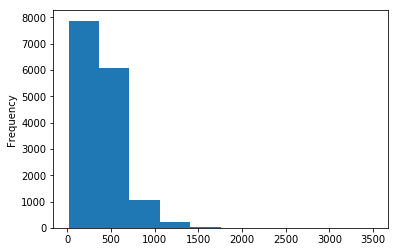

In [8]:
insurancedata.Losses.plot(kind ="hist")

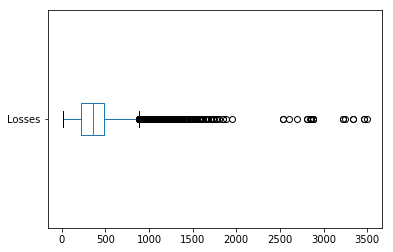

In [9]:
insurancedata.Losses.plot(kind ="box",vert = False)

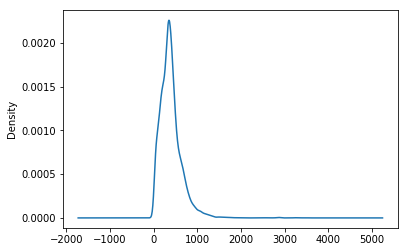

In [10]:
insurancedata.Losses.plot(kind ="density")

In [11]:
pd.value_counts(insurancedata["Number of Vehicles"])

2    5152
3    5095
1    2533
4    2510
Name: Number of Vehicles, dtype: int64

In [12]:
pd.value_counts(insurancedata["Gender Dummy"])

0    7747
1    7543
Name: Gender Dummy, dtype: int64

In [13]:
pd.value_counts(insurancedata["Fuel Type Dummy"])

0    11670
1     3620
Name: Fuel Type Dummy, dtype: int64

In [14]:
pd.value_counts(insurancedata["Married Dummy"])

0    7783
1    7507
Name: Married Dummy, dtype: int64

In [15]:
pd.crosstab(insurancedata["Number of Vehicles"],insurancedata["Gender Dummy"])

Gender Dummy,0,1
Number of Vehicles,,
1,1281,1252
2,2625,2527
3,2551,2544
4,1290,1220


In [16]:
pd.crosstab(insurancedata["Fuel Type Dummy"],insurancedata["Married Dummy"])

Married Dummy,0,1
Fuel Type Dummy,,
0,6651,5019
1,1132,2488


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
insurancedata1 = insurancedata.drop("Policy Number" ,axis = 1)
insurancedata1 = insurancedata1.drop("Number of Vehicles" ,axis = 1)

In [20]:
insurancedata1.head()

,Average Age,Gender Dummy,Married Dummy,Avg Veh Age,Fuel Type Dummy,Losses
0,20.6,1,0,12.97,0,203.319595
1,42.4,0,1,8.02,0,402.197302
2,42.4,1,0,2.50,1,553.132096
3,42.4,0,0,12.97,0,292.430579
4,20.6,1,1,12.97,0,246.540576


In [21]:
intcols = insurancedata1.select_dtypes(include = ["int64"])
floatcols = insurancedata1.select_dtypes(include = ["float64"])

In [22]:
intcols1 = intcols.apply(le.fit_transform)

In [23]:
insurancedatadf = pd.concat([intcols1,floatcols],axis =1)

In [24]:
insurancedatadf.head()

,Gender Dummy,Married Dummy,Fuel Type Dummy,Average Age,Avg Veh Age,Losses
0,1,0,0,20.6,12.97,203.319595
1,0,1,0,42.4,8.02,402.197302
2,1,0,1,42.4,2.50,553.132096
3,0,0,0,42.4,12.97,292.430579
4,1,1,0,20.6,12.97,246.540576


In [25]:
y = insurancedatadf.Losses
X = insurancedatadf.drop("Losses", axis = 1)

In [26]:
X.head()

,Gender Dummy,Married Dummy,Fuel Type Dummy,Average Age,Avg Veh Age
0,1,0,0,20.6,12.97
1,0,1,0,42.4,8.02
2,1,0,1,42.4,2.50
3,0,0,0,42.4,12.97
4,1,1,0,20.6,12.97


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
LinReg = LinearRegression()

In [29]:
LinRegmodel = LinReg.fit(X,y)

In [30]:
LinRegmodel.score(X,y) # R Square of linear Regression Model

0.655415758253336

In [31]:
LinRegmodel.intercept_

645.6600474005863

In [32]:
print(list(zip(X,LinRegmodel.coef_)))

[('Gender Dummy', 55.38670574845391), ('Married Dummy', 84.66942831800313), ('Fuel Type Dummy', 271.11300566812525), ('Average Age', -5.847870367440495), ('Avg Veh Age', -16.319614222355128)]


In [33]:
LinRegPredict = LinRegmodel.predict(X)

In [34]:
LinRegPredict

array([368.91522712, 351.49646608, 683.41101968, ...,  53.29829002,
       720.81032318, 484.39488228])

In [35]:
LossesResidual = y - LinRegPredict # y = ActualPrice LinRegPredict = Predicted price

In [36]:
LossesResidual

0       -165.595633
1         50.700836
2       -130.278924
3        106.385632
4       -207.044079
5         62.462651
6         20.578120
7        115.635746
8       -294.327744
9       -155.425374
10        39.032196
11       136.674999
12      -151.949000
13        53.421689
14        36.307961
15        73.230444
16       113.385077
17        47.947159
18       -41.906379
19        -4.336948
20       121.103345
21       152.380222
22       112.583485
23        54.406926
24      -177.559417
25      -156.724623
26      -126.091093
27        -3.248010
28        24.267355
29       -40.200282
            ...    
15260   -282.505284
15261     62.528991
15262    -11.154439
15263     64.118391
15264    186.837989
15265     96.308754
15266     -7.880069
15267     83.971575
15268     14.724538
15269   -199.023183
15270   -246.503220
15271     74.885315
15272     89.275235
15273    226.734271
15274    422.456880
15275     16.535761
15276    -17.370330
15277    205.193640
15278     27.767607


In [37]:
np.sqrt(np.mean(LossesResidual**2)) #Root mean Square Error

148.9376005607639